# **Logistic Regression-Based Classification for Breast Cancer Diagnosis in Wisconsin Dataset**

* Objective: Build a binary classifier using logistic regression to diagnose breast cancer based on the Wisconsin Breast Cancer Dataset.
* We will cover data loading, preprocessing, model training, evaluation using various metrics, and visualization.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the Dataset

url = "https://raw.githubusercontent.com/SiddardhaShayini/Logistic-Regression-Based-Classification-for-Breast-Cancer-Diagnosis-in-Wisconsin-Dataset/refs/heads/main/Dataset/data.csv"
df = pd.read_csv(url)

In [3]:
# Display the first few rows and basic info to understand the data
print("\nDataset Head:")
df.head()


Dataset Head:


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
print("\nDataset Tail:")
df.tail()


Dataset Tail:


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [5]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_s

In [6]:
print("\nDataset Description:")
df.describe()


Dataset Description:


id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [7]:
# Drop the 'id' column as it's not a feature for classification and 'Unnamed: 32' if it exists (often an artifact)
if 'id' in df.columns:
    df = df.drop('id', axis=1)
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Prepare the Data: Separate features (X) and target (y)
* The 'diagnosis' column is our target variable. 'M' for Malignant, 'B' for Benign.

In [9]:
print("\nPreparing the Data: Separating features and target variable...")
X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0}) # Encode 'M' as 1 (Malignant) and 'B' as 0 (Benign)


Preparing the Data: Separating features and target variable...


* Train/test split
* We'll split the data into 80% for training and 20% for testing to evaluate our model's performance on unseen data. random_state ensures reproducibility.

In [10]:
print("Splitting data into training and testing sets (80/20 split)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Splitting data into training and testing sets (80/20 split)...


* Standardize features
* Logistic Regression is sensitive to the scale of features. Standardization (mean=0, variance=1) helps the optimization algorithm converge faster and improves model performance.

In [11]:
print("Standardizing features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Standardizing features using StandardScaler...


In [12]:
# Convert scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Fit a Logistic Regression model
* We initialize and train a Logistic Regression model on the scaled training data.

In [13]:
print("\nFitting a Logistic Regression model...")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets and L1/L2 regularization
log_reg_model.fit(X_train_scaled, y_train)


Fitting a Logistic Regression model...


LogisticRegression(random_state=42, solver='liblinear')

In [14]:
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


### Evaluate with confusion matrix, precision, recall, ROC-AUC

In [15]:
print("\nEvaluating the model performance...")


Evaluating the model performance...


In [16]:
# Make predictions on the scaled test set
y_pred = log_reg_model.predict(X_test_scaled)
y_pred_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class (Malignant)

### Confusion Matrix
* A table that describes the performance of a classification model.
* True Positives (TP): Correctly predicted as positive.
*True Negatives (TN): Correctly predicted as negative.
* False Positives (FP): Incorrectly predicted as positive (Type I error).
*False Negatives (FN): Incorrectly predicted as negative (Type II error).

In [17]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[71  1]
 [ 2 40]]


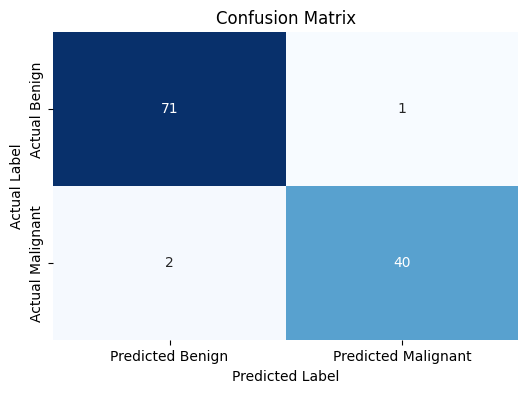

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [19]:
# Accuracy Score
# The proportion of correctly classified instances among the total instances.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9737


In [20]:
# Precision
# The proportion of positive identifications that were actually correct (TP / (TP + FP)).
# High precision indicates a low false positive rate.
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.9756


In [21]:
# Recall (Sensitivity or True Positive Rate)
# The proportion of actual positives that were identified correctly (TP / (TP + FN)).
# High recall indicates a low false negative rate (important in medical diagnosis to avoid missing malignant cases).
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9524


In [22]:
# F1-Score (harmonic mean of precision and recall)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.9639


In [23]:
# ROC Curve and AUC
# Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (TPR) against the
# False Positive Rate (FPR) at various threshold settings.
# Area Under the Curve (AUC) measures the entire 2D area underneath the entire ROC curve.
# A higher AUC indicates a better performing model.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9960


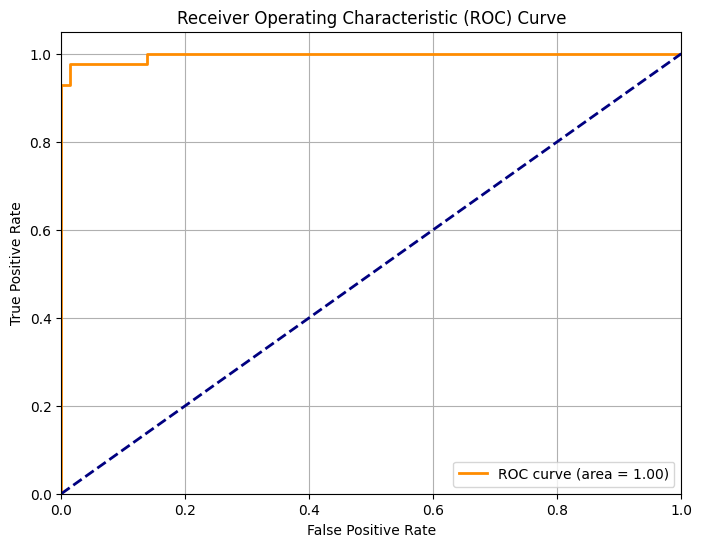

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Summary Analysis Report: Logistic Regression Model Performance**

This report summarizes the performance of a Logistic Regression model based on key classification metrics:

* **Accuracy: 0.9737**
    * **Analysis:** An accuracy of nearly 97.4% indicates that the model correctly classified a very high proportion of the total instances in the test set. This is an excellent overall performance indicator, suggesting the model is generally effective at distinguishing between benign and malignant cases.

* **Precision: 0.9756**
    * **Analysis:** A very high precision of approximately 97.6% means that when the model predicts a case is malignant (positive prediction), it is correct almost all the time. This implies a very low rate of False Positives (incorrectly identifying a benign case as malignant). In a medical context, high precision is valuable as it reduces unnecessary further diagnostic procedures or patient anxiety due to incorrect positive diagnoses.

* **Recall: 0.9524**
    * **Analysis:** A recall of about 95.2% indicates that the model successfully identified over 95% of all actual malignant cases. This signifies a low rate of False Negatives (missing actual malignant cases). In breast cancer diagnosis, high recall is critically important to minimize the risk of missing a true positive diagnosis, which could have serious consequences for patient health.

* **F1-Score: 0.9639**
    * **Analysis:** The F1-Score, the harmonic mean of precision and recall, stands at approximately 96.4%. This metric provides a balanced measure of the model's performance, especially useful when there might be an uneven class distribution. A high F1-Score suggests a strong balance between precision and recall, indicating the model is robust in its ability to both avoid false alarms and catch actual positive cases.

* **ROC-AUC Score: 0.9960**
    * **Analysis:** An outstanding ROC-AUC score of 0.9960 signifies that the model has exceptional discriminative power. This means it is highly capable of distinguishing between the positive and negative classes across various classification thresholds. The closer this value is to 1.0, the better the model is at separating the two classes. This score suggests that even if the default classification threshold were to change, the model would still perform very well in ranking malignant cases higher than benign ones.

---

**Overall Conclusion:**

Based on these metrics, the Logistic Regression model demonstrates **excellent performance** for breast cancer diagnosis. It exhibits a high degree of accuracy, robust precision (minimizing false alarms), and crucial high recall (minimizing missed malignant cases). The exceptionally high ROC-AUC score further reinforces its strong discriminative ability, making it a very promising model for this application.

---


### Tune threshold and explain sigmoid function

In [25]:
# Explanation of Sigmoid Function
print("\nUnderstanding the Sigmoid Function and Threshold Tuning:")
print("The Logistic Regression model outputs a probability value between 0 and 1, computed using the sigmoid function.")
print("The sigmoid function (also known as the logistic function) is defined as:")
print("  $$ \\sigma(z) = \\frac{1}{1 + e^{-z}} $$")
print("Where 'z' is the linear combination of input features and model coefficients: $ z = \\beta_0 + \\beta_1x_1 + \\beta_2x_2 + ... + \\beta_nx_n $")
print("The sigmoid function maps any real-valued number 'z' to a value between 0 and 1, which can be interpreted as a probability.")
print("If the probability is greater than a certain threshold (default is 0.5), the instance is classified as positive (1); otherwise, it's classified as negative (0).")
print("\nEffect of Threshold Tuning:")
print("By default, Logistic Regression uses a classification threshold of 0.5. This means if the predicted probability of being malignant is >= 0.5, it's classified as malignant.")
print("However, we can adjust this threshold to optimize for specific metrics, like recall (to minimize false negatives) or precision (to minimize false positives), depending on the application's needs.")
print("For medical diagnosis, it's often crucial to have a high recall to ensure that as many malignant cases as possible are identified, even if it means a slightly higher false positive rate (i.e., some benign cases are misclassified as malignant, leading to further investigation).")


Understanding the Sigmoid Function and Threshold Tuning:
The Logistic Regression model outputs a probability value between 0 and 1, computed using the sigmoid function.
The sigmoid function (also known as the logistic function) is defined as:
  $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
Where 'z' is the linear combination of input features and model coefficients: $ z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n $
The sigmoid function maps any real-valued number 'z' to a value between 0 and 1, which can be interpreted as a probability.
If the probability is greater than a certain threshold (default is 0.5), the instance is classified as positive (1); otherwise, it's classified as negative (0).

Effect of Threshold Tuning:
By default, Logistic Regression uses a classification threshold of 0.5. This means if the predicted probability of being malignant is >= 0.5, it's classified as malignant.
However, we can adjust this threshold to optimize for specific metrics, like recall (to mi

**A sigmoid function is a bounded, differentiable, real function that is defined for all real input values and has a positive derivative at each point.**

* A sigmoid function is any mathematical function whose graph has a characteristic S-shaped or sigmoid curve.

* A common example of a sigmoid function is the logistic function, which is defined by the formula

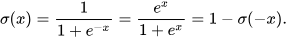

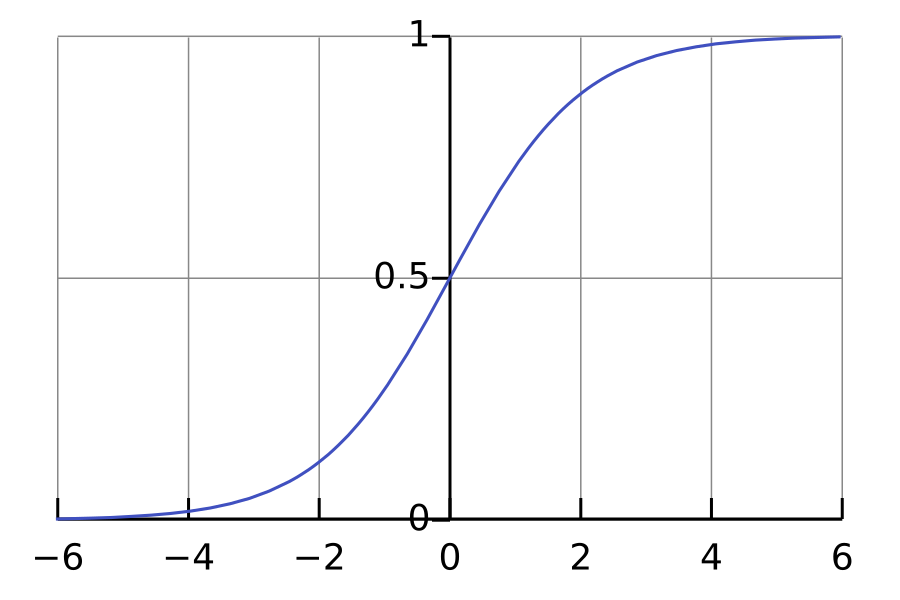

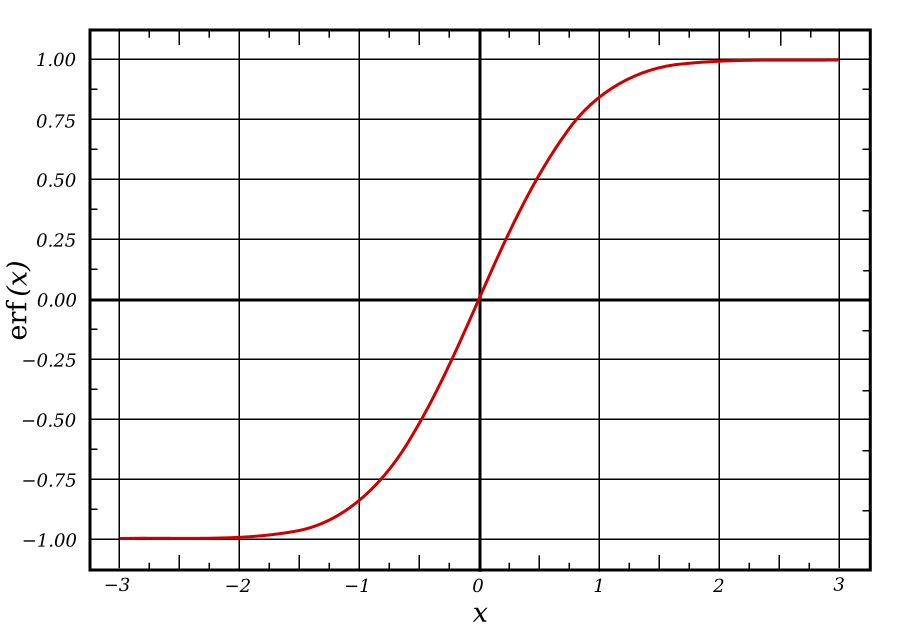

In [26]:
# Calculate precision, recall, and F1-score for various thresholds
thresholds_list = np.arange(0.0, 1.01, 0.05)
precision_scores = []
recall_scores = []
f1_scores = []

In [27]:
for t in thresholds_list:
    custom_y_pred = (y_pred_proba >= t).astype(int)
    precision_scores.append(precision_score(y_test, custom_y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test, custom_y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, custom_y_pred, zero_division=0))

In [28]:
# Choose a threshold for higher recall (e.g., 0.3)
chosen_threshold = 0.3
custom_y_pred_tuned = (y_pred_proba >= chosen_threshold).astype(int)
tuned_precision = precision_score(y_test, custom_y_pred_tuned)
tuned_recall = recall_score(y_test, custom_y_pred_tuned)
tuned_f1 = f1_score(y_test, custom_y_pred_tuned)
tuned_accuracy = accuracy_score(y_test, custom_y_pred_tuned)
tuned_cm = confusion_matrix(y_test, custom_y_pred_tuned)

In [29]:
print(f"\nModel performance with a custom threshold of {chosen_threshold}:")
print(f"  Accuracy: {tuned_accuracy:.4f}")
print(f"  Precision: {tuned_precision:.4f}")
print(f"  Recall: {tuned_recall:.4f}")
print(f"  F1-Score: {tuned_f1:.4f}")
print("\n  Confusion Matrix with tuned threshold:")
print(tuned_cm)


Model performance with a custom threshold of 0.3:
  Accuracy: 0.9825
  Precision: 0.9762
  Recall: 0.9762
  F1-Score: 0.9762

  Confusion Matrix with tuned threshold:
[[71  1]
 [ 1 41]]


In [30]:
# Visualization of Coefficients
print("\nVisualizing Logistic Regression Coefficients:")
# Coefficients indicate the importance and direction of each feature's influence on the log-odds of the positive class.
# Higher absolute values mean greater importance. Positive means increasing the likelihood of Malignant, negative means decreasing.
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg_model.coef_[0]
})
coefficients['Absolute_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)


Visualizing Logistic Regression Coefficients:


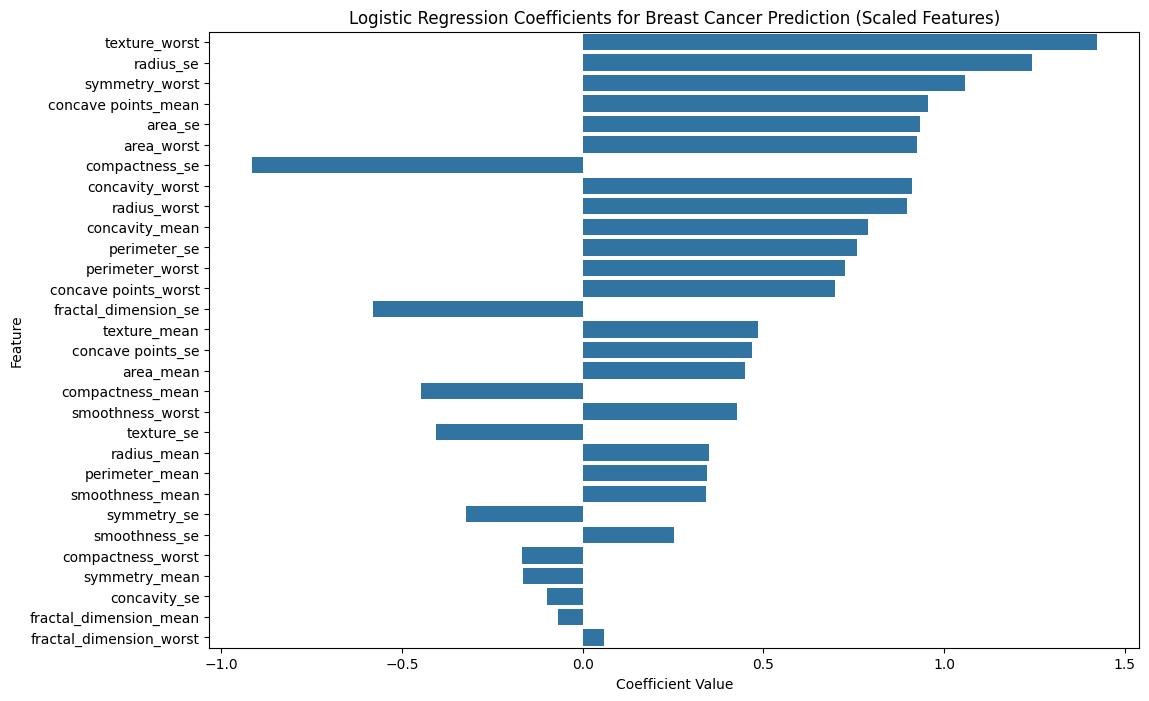

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients for Breast Cancer Prediction (Scaled Features)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [32]:
print("\nSummary of the analysis:")
print("We successfully built a Logistic Regression model for breast cancer diagnosis.")
print("The model was trained on standardized features, and its performance was evaluated using standard classification metrics.")
print("The ROC-AUC score indicates good discriminative power.")
print("We also demonstrated how to adjust the classification threshold to optimize for specific performance goals, such as maximizing recall, which is often critical in medical diagnosis.")
print("Finally, we visualized the coefficients to understand which features contribute most to the model's predictions.")



Summary of the analysis:
We successfully built a Logistic Regression model for breast cancer diagnosis.
The model was trained on standardized features, and its performance was evaluated using standard classification metrics.
The ROC-AUC score indicates good discriminative power.
We also demonstrated how to adjust the classification threshold to optimize for specific performance goals, such as maximizing recall, which is often critical in medical diagnosis.
Finally, we visualized the coefficients to understand which features contribute most to the model's predictions.



Visualizing Feature Correlation Heatmap


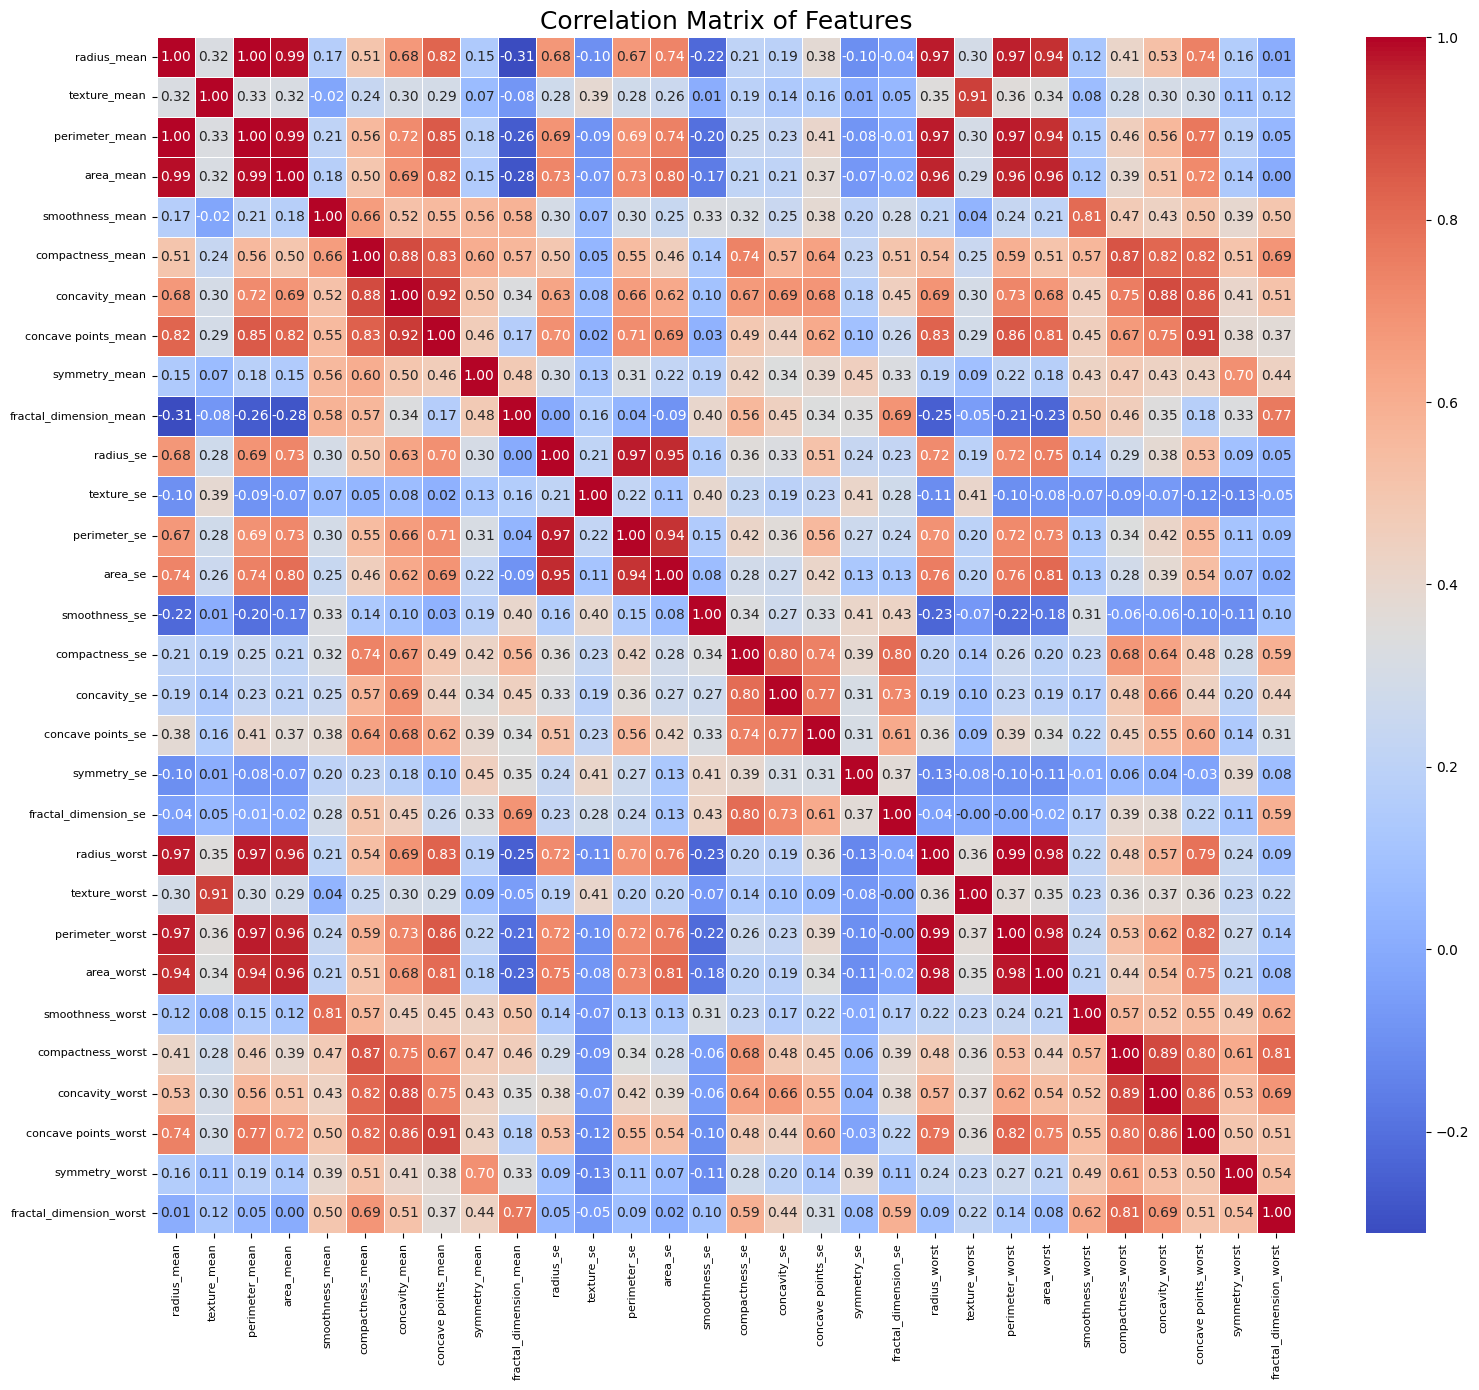

In [38]:
print("\nVisualizing Feature Correlation Heatmap")
plt.figure(figsize=(16, 14))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=18)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


Probability Distribution for each class


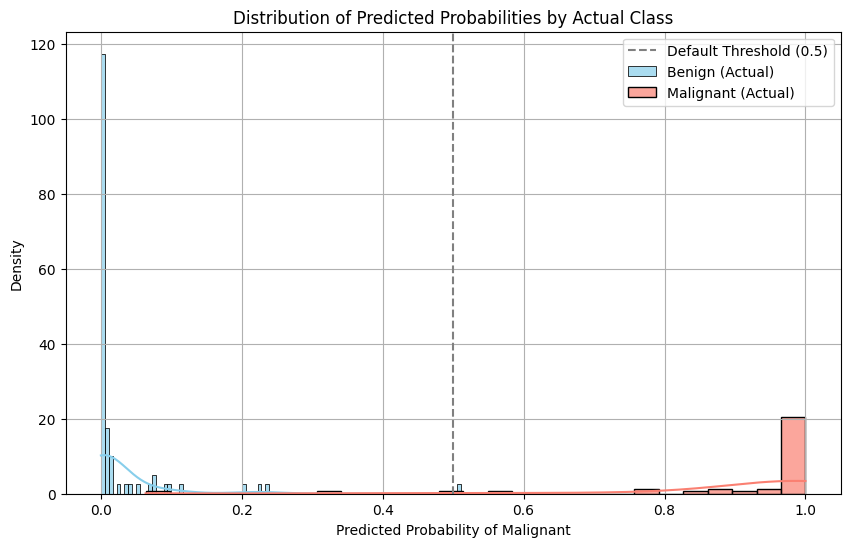

In [37]:
print("\nProbability Distribution for each class")
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba[y_test == 0], color='skyblue', kde=True, label='Benign (Actual)', stat='density', alpha=0.7)
sns.histplot(y_pred_proba[y_test == 1], color='salmon', kde=True, label='Malignant (Actual)', stat='density', alpha=0.7)
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold (0.5)')
plt.title('Distribution of Predicted Probabilities by Actual Class')
plt.xlabel('Predicted Probability of Malignant')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
sns.pairplot(X, corner=True, diag_kind='kde')
plt.show()